#### PROBLEM STATEMENT

    • DOMAIN: Industrial safety. NLP based Chatbot.
    • CONTEXT:

    The database comes from one of the biggest industry in Brazil and in the world. It is an urgent need for industries/companies around the globe to understand why employees still suffer some injuries/accidents in plants. Sometimes they also die in such environment.

#### • DATA DESCRIPTION:

    This The database is basically records of accidents from 12 different plants in 03 different countries which every line in the data is an occurrence of an accident.

    Columns description:

    ‣ Data: timestamp or time/date information
    ‣ Countries: which country the accident occurred (anonymised)
    ‣ Local: the city where the manufacturing plant is located (anonymised)
    ‣ Industry sector: which sector the plant belongs to
    ‣ Accident level: from I to VI, it registers how severe was the accident (I means not severe but VI means very severe)
    ‣ Potential Accident Level: Depending on the Accident Level, the database also registers how severe the accident could have been (due to other factors involved in the accident)
    ‣ Gender: if the person is male of female
    ‣ Employee or Third Party: if the injured person is an employee or a third party
    ‣ Critical Risk: some description of the risk involved in the accident
    ‣ Description: Detailed description of how the accident happened.
    Link to download the dataset: https://drive.google.com/file/d/1_GmrRP1S2OIa02KlfOBNkYa8uxazGbfE/view?usp=sharing, Original dataset link: https://www.kaggle.com/ihmstefanini/industrial-safety-and-health-analytics-database

#### • PROJECT OBJECTIVE:

    Design a ML/DL based chatbot utility which can help the professionals to highlight the safety risk as per the incident description.

#### • PROJECT TASK: [ Duration: 6 weeks, Score: 100 points]

    1. Milestone 1: [ Duration: 2 weeks, Score: 20 points] 
    ‣ Input: Interim report
    ‣ Process:
        ‣ Step 1: Import the data
        ‣ Step 2: Data cleansing
        ‣ Step 3: Data preprocessing
        ‣ Step 4: Data preparation to be used for AIML model learning
        ‣ Output: Clean data as .xlsx or .csv file to be used for AIML model learning 
    
    2. Milestone 2: [ Duration: 2 weeks, Score: 20 points]
    ‣ Input: Output of milestone 1 
    ‣ Process:
        ‣ Step 1: NLP pre processing
        ‣ Step 2: Design, train and test machine learning classifiers
        ‣ Step 3: Design, train and test Neural networks classifiers
        ‣ Step 4: Design, train and test RNN or LSTM classifiers
        ‣ Step 5: Choose the best performing model classifier and pickle it.
        ‣ Output: Pickled model to be used for future prediction
        ‣ Submission: Interim report

    3. Milestone 3: [ Duration: 2 weeks, Score: 60 points]
        ‣ Input: Pickled model from milestone 2 
        ‣ Process: [ 15 points ]
        ‣ Step 1: Design a clickable UI which can automate tasks performed under milestone 1 [ 5 points ] 
        ‣ Step 2: Design a clickable UI which can automate tasks performed under milestone 2 [ 5 points ] 
        ‣ Step 3: Design a clickable UI based chatbot interface [ 5 points ]
        ‣ Output: Clickable UI based chatbot interface which accepts text as input and replies back with relevant answers. ‣ Submission: Final report [ 45 points ]
        ‣ Hints:
        ‣ Please refer to the blog to understand the basic designing and functioning of chatbots: https://www.mygreatlearning.com/blog/basics-of-building-an-artificial-intelligence-chatbot/
        ‣ To make GUI as a desk app you can use TKINTER library.
        ‣ To make web service GUI you can use FLASK or DJANGO library.

## 1. Milestone 1: 

####  ‣ Input: Interim report
        ‣ Process:
            ‣ Step 1: Import the data
            ‣ Step 2: Data cleansing
            ‣ Step 3: Data preprocessing
            ‣ Step 4: Data preparation to be used for AIML model learning
            ‣ Output: Clean data as .xlsx or .csv file to be used for AIML model learning 

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from nltk.tokenize import word_tokenize
import warnings
warnings.filterwarnings('ignore')

#### ‣ Step 1: Import the data

In [2]:
data=pd.read_csv("/Users/shreekkanthkalyanasundaram/AIML/Capestone/Data Set - industrial_safety_and_health_database_with_accidents_description.csv")

In [3]:
print("Number of rows = {0}\nNumber of Columns = {1} ".format(data.shape[0], data.shape[1]))

Number of rows = 425
Number of Columns = 11 


In [4]:
data.head(3)

,Unnamed: 0,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,0,2016-01-01 00:00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,1,2016-01-02 00:00:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2,2016-01-06 00:00:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Unnamed: 0                425 non-null    int64 
 1   Data                      425 non-null    object
 2   Countries                 425 non-null    object
 3   Local                     425 non-null    object
 4   Industry Sector           425 non-null    object
 5   Accident Level            425 non-null    object
 6   Potential Accident Level  425 non-null    object
 7   Genre                     425 non-null    object
 8   Employee or Third Party   425 non-null    object
 9   Critical Risk             425 non-null    object
 10  Description               425 non-null    object
dtypes: int64(1), object(10)
memory usage: 36.6+ KB


#### ‣ Step 2: Data cleansing

* As Data field contains date of unuseable format. Lets split them into year, month & day field and drop Data

In [6]:
data['Data']=pd.to_datetime(data.Data)
data['year']=data['Data'].apply(lambda x : x.year)
data['month']=data['Data'].apply(lambda x : x.month)
data['date']=data['Data'].apply(lambda x : x.day)

* dropping 'Unnamed: 0','Data' from dataframe

In [7]:
data.drop(["Unnamed: 0","Data"], axis=1, inplace=True)

* Renaming due to spelling mistakes in column headers 

In [8]:
data.rename(columns={'Countries':'Country', 'Genre':'Gender', 'Employee or Third Party':'Employee type'}, inplace=True)
data.head()

,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee type,Critical Risk,Description,year,month,date
0,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,2016,1,1
1,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...,2016,1,2
2,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...,2016,1,6
3,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...,2016,1,8
4,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...,2016,1,10


In [9]:
print('\033[1m' + "categorical attributes:"+'\033[0m')
print("="*30)
cat_attr=[]
for i in data.columns:
    if 86 >= data[i].nunique():
        print(i,":",data[i].unique())
        cat_attr.append(i)

categorical attributes:
Country : ['Country_01' 'Country_02' 'Country_03']
Local : ['Local_01' 'Local_02' 'Local_03' 'Local_04' 'Local_05' 'Local_06'
 'Local_07' 'Local_08' 'Local_10' 'Local_09' 'Local_11' 'Local_12']
Industry Sector : ['Mining' 'Metals' 'Others']
Accident Level : ['I' 'IV' 'III' 'II' 'V']
Potential Accident Level : ['IV' 'III' 'I' 'II' 'V' 'VI']
Gender : ['Male' 'Female']
Employee type : ['Third Party' 'Employee' 'Third Party (Remote)']
Critical Risk : ['Pressed' 'Pressurized Systems' 'Manual Tools' 'Others'
 'Fall prevention (same level)' 'Chemical substances' 'Liquid Metal'
 'Electrical installation' 'Confined space'
 'Pressurized Systems / Chemical Substances'
 'Blocking and isolation of energies' 'Suspended Loads' 'Poll' 'Cut'
 'Fall' 'Bees' 'Fall prevention' '\nNot applicable' 'Traffic' 'Projection'
 'Venomous Animals' 'Plates' 'Projection/Burning' 'remains of choco'
 'Vehicles and Mobile Equipment' 'Projection/Choco' 'Machine Protection'
 'Power lock' 'Burn' 'Pr

In [10]:
data.isnull().sum()

Country                     0
Local                       0
Industry Sector             0
Accident Level              0
Potential Accident Level    0
Gender                      0
Employee type               0
Critical Risk               0
Description                 0
year                        0
month                       0
date                        0
dtype: int64

* No null values found

In [11]:
data.describe() #5-Point Summary analysis

,year,month,date
count,425.000000,425.000000,425.000000
mean,2016.329412,5.254118,14.981176
std,0.470554,3.189959,8.661051
min,2016.000000,1.000000,1.000000
25%,2016.000000,3.000000,8.000000
50%,2016.000000,5.000000,15.000000
75%,2017.000000,7.000000,22.000000
max,2017.000000,12.000000,31.000000


In [12]:
data.describe(include=object)

,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee type,Critical Risk,Description
count,425,425,425,425,425,425,425,425,425
unique,3,12,3,5,6,2,3,33,411
top,Country_01,Local_03,Mining,I,IV,Male,Third Party,Others,During the activity of chuteo of ore in hopper...
freq,251,90,241,316,143,403,189,232,3


#### Inference:
    * Small data set(425x11) but with relevant information.
    * No missing values in the dataset.Also, removed unnecessary column named ”Unnamed: 0” & "Data" as we do not know any related metadata and adds no value to the analysis.
    * Renamed columns with spelling mistakes and space
    * Five Point Summary analysis:
        - Country 01 is the country where most of the accidents happen (more than 50%)
        - Local 03 (which also belongs to Country 01) is where most of the accidents happen
        - Mining is also the most significant contributor to accidents
        - Male (95%) and Third Party (43%) also counts for kind of people that suffers more accident

#### EDA

In [13]:
data['Country'].value_counts()

Country_01    251
Country_02    130
Country_03     44
Name: Country, dtype: int64

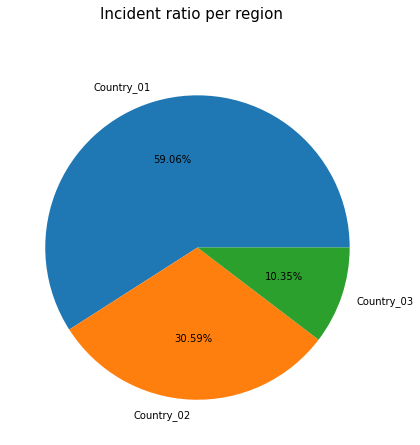

In [14]:
fig=plt.figure(figsize=(7,7))
fig.suptitle('Incident ratio per region', fontsize=15)
plt.pie(data['Country'].value_counts(), labels=['Country_01', 'Country_02','Country_03'], explode=(0,0,0),autopct = '%1.2f%%')
plt.show()

#### Inference:
    * Country_01 has more incident records - 59.06% 
    * Country_02 has 30.59% of incident registered
    * Country_03 has 10.35% of records

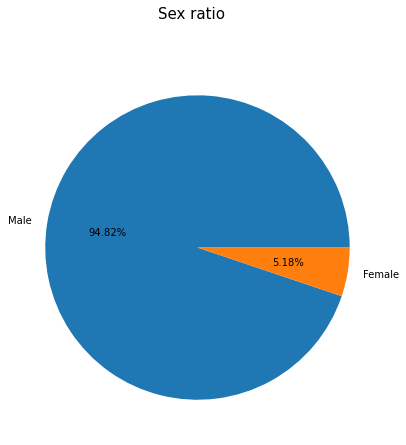

In [15]:
fig=plt.figure(figsize=(7,7))
fig.suptitle('Sex ratio', fontsize=15)
plt.pie(data['Gender'].value_counts(), labels=['Male', 'Female'], explode=(0,0),autopct = '%1.2f%%')
plt.show()

#### Inference:
    * Male employees are much impacted during the accident at workplace than the female employees

#### Employee type by Gender - Is the distribution of employee type differ significantly in different genders?

In [16]:
# f = lambda x : np.round(x/x.sum() * 100)
# em_gen = data.groupby(['Gender','Employee type'])['Employee type'].count().unstack().apply(f, axis=1)

# hv.Bars(pd.melt(em_gen.reset_index(), ['Gender']), ['Gender','Employee type'], 'value').opts(opts.Bars(title="Employee type by Gender Count", width=800, height=300,tools=['hover'],\
#                                                                 show_grid=True,xrotation=0, ylabel="Percentage", yformatter='%d%%'))

Proportion of own employees in each gender is not equal. But let's check is that difference is statistically significant?

    1. State the H0 and Ha
        Ho = The proportions of own employees in each gender is equal.
        Ha = The proportions of own employees in each gender is not equal.
    2. Decide the significance level: alpha = 0.05
    3. Identify the test-statistic: Z-test of proportions
    4. Calculate the p_value using test-statistic

In [17]:
data.groupby([data[data['Employee type'] == 'Employee']['Gender']])['Gender'].count()

Gender
Female      8
Male      171
Name: Gender, dtype: int64

In [18]:
male_emp = data[data['Employee type'] == 'Employee'].Gender.value_counts()[0]
female_emp = data[data['Employee type'] == 'Employee'].Gender.value_counts()[1]


Male_cnt = data[data['Gender'] == 'Male']['Gender'].count()
Female_cnt = data[data['Gender'] == 'Female']['Gender'].count()

print([male_emp, female_emp], [Male_cnt, Female_cnt])
print(f'Proportion of own employee types in male, female = {round(170/396,2)}%, {round(8/22,2)}% respectively')

[171, 8] [403, 22]
Proportion of own employee types in male, female = 0.43%, 0.36% respectively


In [19]:
from statsmodels.stats.proportion import proportions_ztest
t_statistic, p_value = proportions_ztest([male_emp, female_emp], [Male_cnt, Female_cnt])

print("t_statistic", t_statistic)
print("p_value", p_value)

t_statistic 0.5613307169271039
p_value 0.5745721052729147


#### Decide to Reject or Accept Null Hypothesis

In [20]:
reject_null = False
if p_value < 0.05:
    reject_null = True 
else: 
    reject_null = False
    
print("reject null? : " + str(reject_null))

reject null? : False


#### Inference:
Hence we fail to reject Null Hypothesis, we have enough (95%) evidence to prove that, the proportion of own employees in each gender is equal.

<AxesSubplot:xlabel='Industry Sector', ylabel='count'>

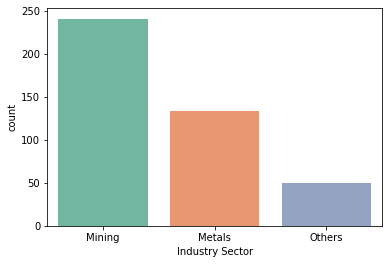

In [21]:
sns.countplot(data=data,x=data['Industry Sector'],palette = "Set2")

In [22]:
#Percentage of contribution
data['Industry Sector'].value_counts(normalize=True)*100

Mining    56.705882
Metals    31.529412
Others    11.764706
Name: Industry Sector, dtype: float64

#### Inference:
       * Above plots depicts Mining industry sector has more Accidents, followed by Metals Industry Sector and others 

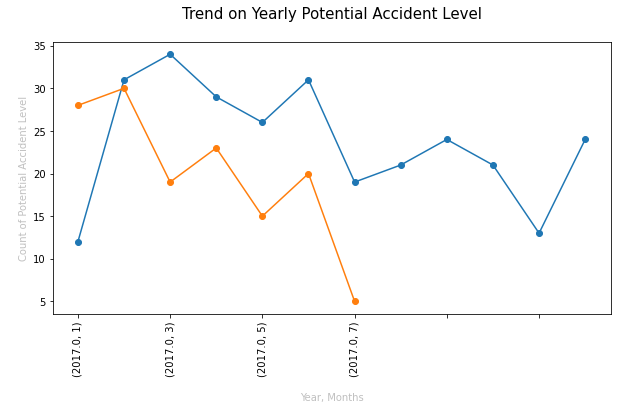

In [23]:
#Accident patterns by yearly
fig,(ax1) = plt.subplots()
ax1.set_title('Trend on Yearly Potential Accident Level\n',fontsize = 15)
data.groupby([data[data['year']==2016]['year'],'month'])['Potential Accident Level'].count().plot(style="-o", figsize=(10, 5))
data.groupby([data[data['year']==2017]['year'],'month'])['Potential Accident Level'].count().plot(style="-o", figsize=(10, 5))
plt.xlabel('\nYear, Months').set_color('silver')
plt.ylabel('\nCount of Potential Accident Level').set_color('silver')
plt.xticks(rotation = 'vertical')
plt.show()

#### Inference:
    * Above plot depicts the count of Potential Accident Level for each month against the years (2016 & 2017)

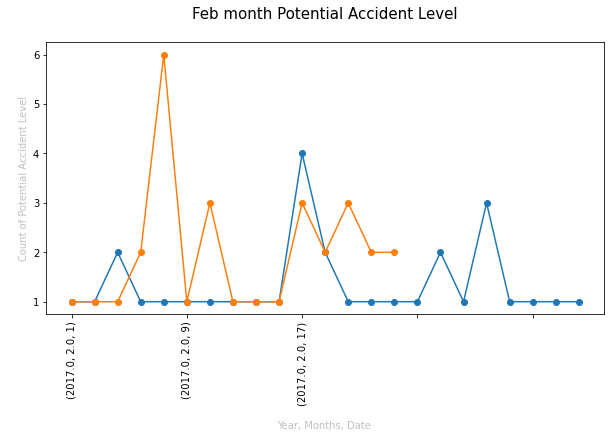

In [24]:
# EDA for hightest Accident month - Feb per Above analysis
fig,(ax1) = plt.subplots()
ax1.set_title('Feb month Potential Accident Level\n',fontsize = 15)
data.groupby([data[data['year']==2016]['year'],data[data['month']==2]['month'],'date'])['Potential Accident Level'].count().plot(style="-o", figsize=(10, 5))
data.groupby([data[data['year']==2017]['year'],data[data['month']==2]['month'],'date'])['Potential Accident Level'].count().plot(style="-o", figsize=(10, 5))
plt.xlabel('\nYear, Months, Date ').set_color('silver')
plt.ylabel('\nCount of Potential Accident Level').set_color('silver')
plt.xticks(rotation = 'vertical')
plt.show()

#### Inference:
    * Per day Potential Accident count level was higher on 2017 month of Feb

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'Others'),
  Text(1, 0, 'Pressed'),
  Text(2, 0, 'Manual Tools'),
  Text(3, 0, 'Chemical substances'),
  Text(4, 0, 'Venomous Animals'),
  Text(5, 0, 'Cut'),
  Text(6, 0, 'Projection'),
  Text(7, 0, 'Bees'),
  Text(8, 0, 'Fall'),
  Text(9, 0, 'Vehicles and Mobile Equipment'),
  Text(10, 0, 'Pressurized Systems'),
  Text(11, 0, 'Fall prevention (same level)'),
  Text(12, 0, 'remains of choco'),
  Text(13, 0, 'Suspended Loads'),
  Text(14, 0, 'Fall prevention'),
  Text(15, 0, 'Pressurized Systems / Chemical Substances'),
  Text(16, 0, 'Power lock'),
  Text(17, 0, 'Liquid Metal'),
  Text(18, 0, 'Blocking and isolation of energies'),
  Text(19, 0, 'Machine Protection'),
  Text(20, 0, 'Electrical Shock'),
  Text(21, 0, 'Projection of fragments'),
  Text(22, 0, 'Projection/Burning'),
  Text(23, 0, 'Individual protection equipment')

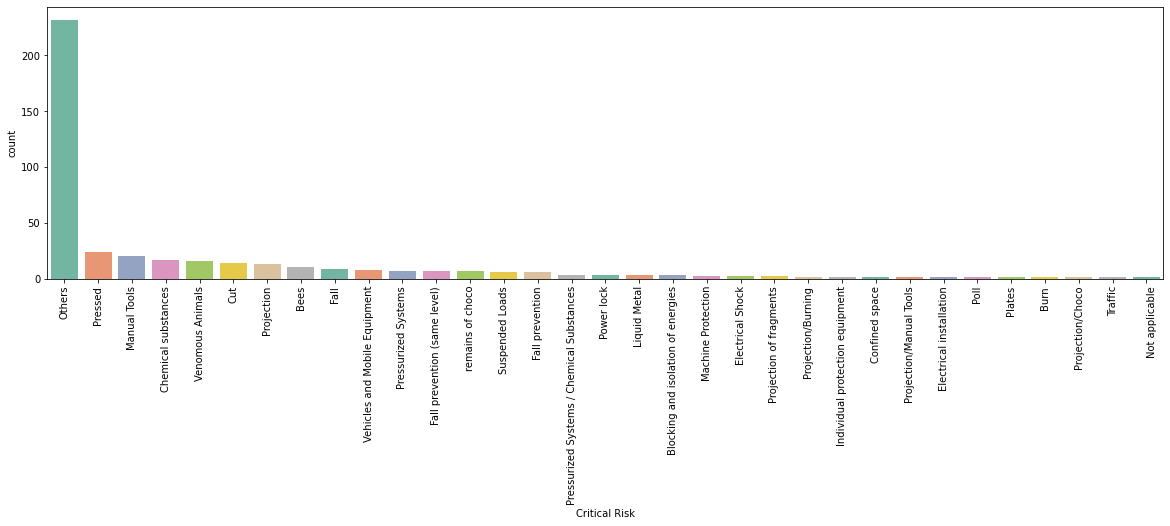

In [25]:
#Analysising Critical Risk - count of each items
plt.figure(figsize=(20,5))
descending_order = data['Critical Risk'].value_counts().sort_values(ascending=False).index
sns.countplot(data=data,x=data['Critical Risk'],palette = "Set2",order=descending_order)
plt.xticks(rotation = 'vertical')

#### Inference:
    * 232 records are uncategorised risks (others), followed by 24 records of Pressed issues

<AxesSubplot:xlabel='Potential Accident Level', ylabel='count'>

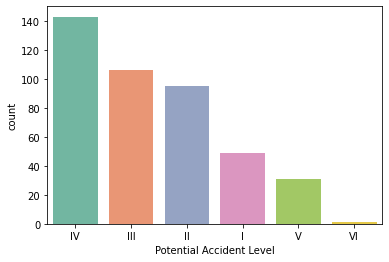

In [26]:
#trend on Potential Accident Level
descending_order = data['Potential Accident Level'].value_counts().sort_values(ascending=False).index
sns.countplot(data=data,x=data['Potential Accident Level'],palette = "Set2",order=descending_order)

In [27]:
#Percentage of contribution
data['Potential Accident Level'].value_counts(normalize=True)*100

IV     33.647059
III    24.941176
II     22.352941
I      11.529412
V       7.294118
VI      0.235294
Name: Potential Accident Level, dtype: float64

#### Inference:
    * 33.64 % of risk belongs to Potential Accident Level 3   
    * 24.9 % of risk belongs to Potential Accident Level 2 
    * 22.4 % of risk belongs to Potential Accident Level 1
    * 11.5 % of risk belongs to Potential Accident Level 0
    * 7.3 % of risk belongs to Potential Accident Level 4
    * 0.24 % of risk belongs to Potential Accident Level 5
    
    This shows that we are dealing with bias data

In [28]:
data.head(3)

,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee type,Critical Risk,Description,year,month,date
0,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,2016,1,1
1,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...,2016,1,2
2,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...,2016,1,6


#### ‣ Step 3: Data preprocessing

#### Label encoding to convert as numerical values

* Since need to have labels that should be capable of using in for loop, lets perform labelencoding - like Potential Accident Level to covert Roman char to numbers

In [29]:
#Encoding Categorical variable Geography
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct =ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[1])],remainder="passthrough")
df = np.array(ct.fit_transform(data))
df

array([[1.0, 0.0, 0.0, ..., 2016, 1, 1],
       [0.0, 1.0, 0.0, ..., 2016, 1, 2],
       [0.0, 0.0, 1.0, ..., 2016, 1, 6],
       ...,
       [0.0, 0.0, 0.0, ..., 2017, 7, 5],
       [0.0, 0.0, 0.0, ..., 2017, 7, 6],
       [0.0, 0.0, 0.0, ..., 2017, 7, 9]], dtype=object)

In [30]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

data['Potential Accident Level']=le.fit_transform(data['Potential Accident Level']).astype(np.int8)
# data['Country']=le.fit_transform(data['Country']).astype(np.int8)
data['Gender']=le.fit_transform(data['Gender']).astype(np.int8)
# data['Employee type']=le.fit_transform(data['Employee type']).astype(np.int8)
data['Critical Risk']=le.fit_transform(data['Critical Risk']).astype(np.int8)
data['Accident Level']=le.fit_transform(data['Accident Level']).astype(np.int8)
data['Industry Sector']=le.fit_transform(data['Industry Sector']).astype(np.int8)
data['Local']=le.fit_transform(data['Local']).astype(np.int8)

* onehot encoding using dummies approach on country to aviod some sort of hierarchy/order issue on label encoding

In [31]:
# creating initial dataframe
dum_df = pd.DataFrame(data, columns=['Country','Employee type'])
# generate binary values using get_dummies
dum_df = pd.get_dummies(dum_df, columns=["Country","Employee type"], prefix=["Type_is","Etype_is"] )
# # merge with main df bridge_df on key values
data = data.join(dum_df)
data.head(10)

,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee type,Critical Risk,Description,year,month,date,Type_is_Country_01,Type_is_Country_02,Type_is_Country_03,Etype_is_Employee,Etype_is_Third Party,Etype_is_Third Party (Remote)
0,Country_01,0,1,0,3,1,Third Party,20,While removing the drill rod of the Jumbo 08 f...,2016,1,1,1,0,0,0,1,0
1,Country_02,1,1,0,3,1,Employee,21,During the activation of a sodium sulphide pum...,2016,1,2,0,1,0,1,0,0
2,Country_01,2,1,0,2,1,Third Party (Remote),15,In the sub-station MILPO located at level +170...,2016,1,6,1,0,0,0,0,1
3,Country_01,3,1,0,0,1,Third Party,16,Being 9:45 am. approximately in the Nv. 1880 C...,2016,1,8,1,0,0,0,1,0
4,Country_01,3,1,3,3,1,Third Party,16,Approximately at 11:45 a.m. in circumstances t...,2016,1,10,1,0,0,0,1,0
5,Country_02,4,0,0,2,1,Third Party (Remote),21,During the unloading operation of the ustulado...,2016,1,12,0,1,0,0,0,1
6,Country_02,4,0,0,2,1,Employee,11,The collaborator reports that he was on street...,2016,1,16,0,1,0,1,0,0
7,Country_01,3,1,0,2,1,Third Party,20,"At approximately 04:50 p.m., when the mechanic...",2016,1,17,1,0,0,0,1,0
8,Country_02,1,1,0,3,1,Third Party (Remote),16,Employee was sitting in the resting area at le...,2016,1,19,0,1,0,0,0,1
9,Country_01,5,0,0,1,1,Third Party,4,At the moment the forklift operator went to ma...,2016,1,26,1,0,0,0,1,0


* dropping Country column

In [32]:
data.drop(["Country"], axis=1, inplace=True)
data.head(3)

,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee type,Critical Risk,Description,year,month,date,Type_is_Country_01,Type_is_Country_02,Type_is_Country_03,Etype_is_Employee,Etype_is_Third Party,Etype_is_Third Party (Remote)
0,0,1,0,3,1,Third Party,20,While removing the drill rod of the Jumbo 08 f...,2016,1,1,1,0,0,0,1,0
1,1,1,0,3,1,Employee,21,During the activation of a sodium sulphide pum...,2016,1,2,0,1,0,1,0,0
2,2,1,0,2,1,Third Party (Remote),15,In the sub-station MILPO located at level +170...,2016,1,6,1,0,0,0,0,1


In [33]:
#Function definition to generate Word cloud 
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
stopwords = stopwords.union(set(['mr','mrs','one','two','said']))

def show_wordcloud(data,bg_color):
    wordcloud = WordCloud(
        background_color=bg_color,
        stopwords=stopwords,
        max_words=100,
        colormap='ocean_r',
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data).lower())

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()
    print(wordcloud.words_.keys())

#### words in each Potential Accident Levels


Potential Accident Level:  0


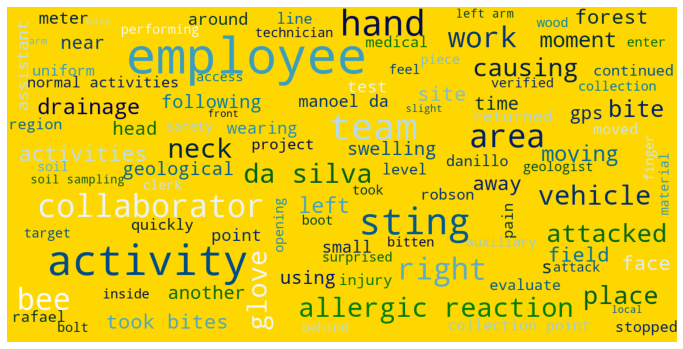

dict_keys(['employee', 'activity', 'team', 'sting', 'hand', 'area', 'collaborator', 'bee', 'right', 'work', 'vehicle', 'neck', 'glove', 'da silva', 'allergic reaction', 'causing', 'attacked', 'place', 'bite', 'moving', 'left', 'drainage', 'activities', 'moment', 'field', 'face', 'away', 'site', 'forest', 'took bites', 'swelling', 'using', 'time', 'another', 'near', 'head', 'gps', 'geological', 'following', 's', 'around', 'small', 'point', 'test', 'assistant', 'meter', 'returned', 'wearing', 'manoel da', 'project', 'level', 'region', 'uniform', 'injury', 'pain', 'line', 'continued', 'robson', 'rafael', 'danillo', 'stopped', 'evaluate', 'medical', 'moved', 'quickly', 'collection point', 'normal activities', 'target', 'inside', 'soil', 'bitten', 'feel', 'opening', 'technician', 'performing', 'took', 'collection', 'behind', 'surprised', 'attack', 'finger', 'piece', 'material', 'boot', 'safety', 'bolt', 'auxiliary', 'wood', 'geologist', 'access', 'clerk', 'enter', 'verified', 'soil sampling

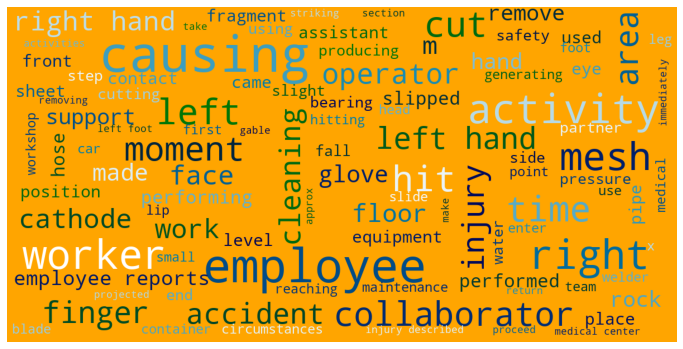

dict_keys(['causing', 'employee', 'activity', 'right', 'worker', 'mesh', 'hit', 'cut', 'left', 'time', 'collaborator', 'moment', 'area', 'injury', 'finger', 'left hand', 'cleaning', 'operator', 'accident', 'cathode', 'face', 'work', 'right hand', 'm', 'floor', 'made', 'glove', 'hand', 'remove', 'rock', 'support', 'employee reports', 'slipped', 'performed', 'performing', 'hose', 'assistant', 'sheet', 'place', 'equipment', 'front', 'used', 'position', 'level', 'fragment', 'contact', 'came', 'eye', 'pipe', 'side', 'step', 'fall', 'slight', 'producing', 'using', 'safety', 'pressure', 'end', 'water', 'partner', 'bearing', 'cutting', 'foot', 'generating', 'first', 'maintenance', 'team', 'medical', 'circumstances', 'head', 'point', 'enter', 'lip', 'slide', 'use', 'hitting', 'x', 'small', 'reaching', 'container', 'leg', 'welder', 'workshop', 'car', 'blade', 'injury described', 'left foot', 'medical center', 'immediately', 'take', 'removing', 'approx', 'section', 'striking', 'activities', 'proc

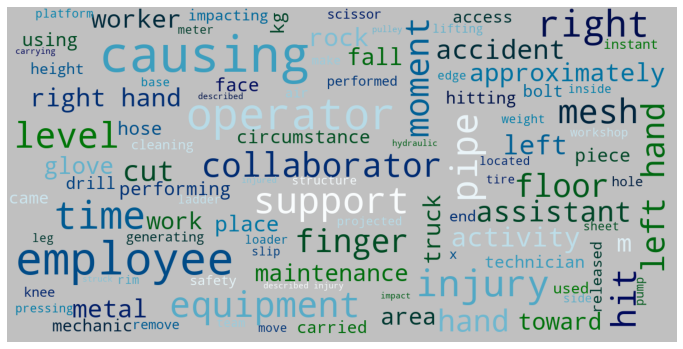

dict_keys(['causing', 'employee', 'operator', 'time', 'right', 'injury', 'pipe', 'support', 'level', 'equipment', 'collaborator', 'mesh', 'moment', 'hit', 'finger', 'floor', 'left hand', 'hand', 'assistant', 'cut', 'left', 'activity', 'accident', 'approximately', 'm', 'metal', 'rock', 'worker', 'right hand', 'maintenance', 'work', 'toward', 'area', 'glove', 'truck', 'fall', 'place', 'performing', 'hose', 'face', 'using', 'piece', 'kg', 'circumstance', 'mechanic', 'access', 'came', 'carried', 'hitting', 'drill', 'bolt', 'technician', 'used', 'released', 'impacting', 'height', 'end', 'generating', 'performed', 'knee', 'remove', 'instant', 'cleaning', 'hole', 'air', 'scissor', 'x', 'safety', 'lifting', 'tire', 'loader', 'platform', 'structure', 'leg', 'base', 'projected', 'pressing', 'move', 'rim', 'make', 'side', 'slip', 'weight', 'team', 'edge', 'sheet', 'inside', 'workshop', 'ladder', 'located', 'pump', 'meter', 'described injury', 'pulley', 'struck', 'injured', 'hydraulic', 'impact', 

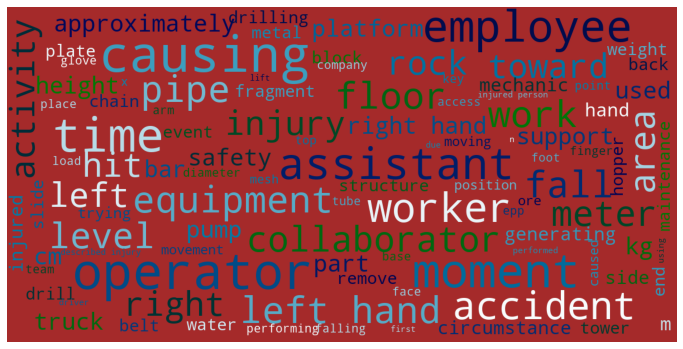

dict_keys(['causing', 'operator', 'time', 'moment', 'employee', 'assistant', 'worker', 'accident', 'work', 'equipment', 'fall', 'left hand', 'floor', 'pipe', 'area', 'collaborator', 'level', 'meter', 'injury', 'right', 'toward', 'hit', 'activity', 'rock', 'left', 'approximately', 'height', 'platform', 'right hand', 'part', 'safety', 'truck', 'support', 'kg', 'used', 'cm', 'pump', 'bar', 'circumstance', 'mechanic', 'side', 'm', 'hand', 'generating', 'injured', 'fragment', 'end', 'drilling', 'plate', 'drill', 'structure', 'block', 'weight', 'back', 'remove', 'maintenance', 'belt', 'hopper', 'water', 'event', 'metal', 'slide', 'chain', 'tower', 'trying', 'position', 'ore', 'movement', 'caused', 'moving', 'performing', 'finger', 'point', 'falling', 'mesh', 'epp', 'tube', 'company', 'access', 'team', 'load', 'face', 'x', 'arm', 'key', 'base', 'foot', 'top', 'diameter', 'place', 'glove', 'described injury', 'injured person', 'driver', 'lift', 'first', 'using', 'performed', 'due', 'n'])

Pote

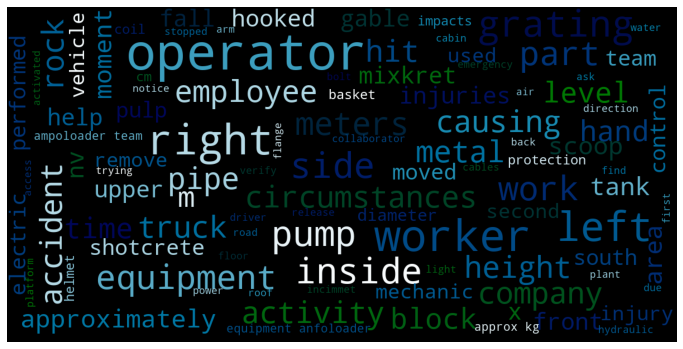

dict_keys(['operator', 'worker', 'right', 'left', 'grating', 'side', 'pump', 'inside', 'equipment', 'part', 'work', 'meters', 'rock', 'accident', 'pipe', 'activity', 'causing', 'circumstances', 'hit', 'height', 'company', 'truck', 'employee', 'metal', 'm', 'time', 'level', 'block', 'hand', 'approximately', 'area', 'moment', 'scoop', 'tank', 'nv', 'mixkret', 'help', 'injuries', 'front', 'upper', 'gable', 'x', 'hooked', 'fall', 'shotcrete', 'moved', 'performed', 'pulp', 'south', 'control', 'team', 'electric', 'mechanic', 'vehicle', 'remove', 'injury', 'second', 'used', 'diameter', 'protection', 'cm', 'impacts', 'helmet', 'basket', 'coil', 'equipment anfoloader', 'approx kg', 'ampoloader team', 'release', 'due', 'water', 'roof', 'verify', 'ask', 'emergency', 'activated', 'collaborator', 'flange', 'air', 'first', 'incimmet', 'direction', 'plant', 'cabin', 'cables', 'power', 'floor', 'driver', 'find', 'light', 'notice', 'trying', 'stopped', 'arm', 'road', 'bolt', 'hydraulic', 'platform', 'a

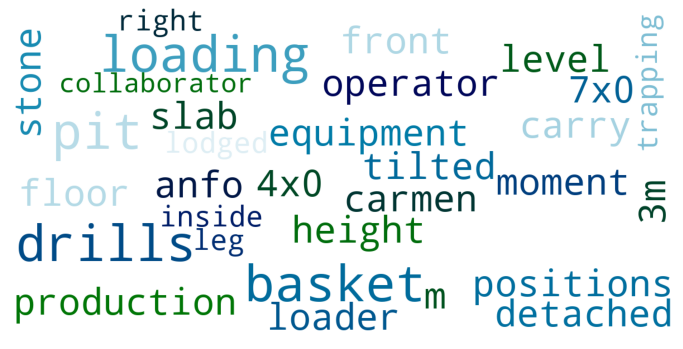

dict_keys(['loading', 'drills', 'pit', 'basket', 'process', 'carmen', 'level', 'operator', 'positions', 'anfo', 'loader', 'equipment', 'height', '3m', 'floor', 'carry', 'production', 'moment', 'stone', 'slab', '4x0', '7x0', 'm', 'detached', 'front', 'tilted', 'lodged', 'inside', 'trapping', 'right', 'leg', 'collaborator'])


In [34]:
#function call for word cloud & print each Potential Accident Level words

bg_color=['gold','orange','silver','brown','black','white']   

# cloud={}
for i in range(0,6):  
   corpus=[]
   print('\nPotential Accident Level: ',i)
   for j in data[data['Potential Accident Level']==i].index:
       corpus= ' '.join([data['Description'][j],str(corpus)])
   show_wordcloud(corpus,bg_color[i])

In [35]:
#drop if any duplicate records in the given dataset
# data.drop_duplicates(inplace=True)
# print("Total no. of records after removing duplicates:",len(data))

* since, per analysis dataset has unqiue 425 records. However like record number (39 & 40, 389 & 390,..) have the same descriptions but differnt values on other attributes
* Hence not removing the duplicates with commands

#### ‣ Step 4: Data preparation to be used for AIML model learning

In [36]:
data.head(2)

,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee type,Critical Risk,Description,year,month,date,Type_is_Country_01,Type_is_Country_02,Type_is_Country_03,Etype_is_Employee,Etype_is_Third Party,Etype_is_Third Party (Remote)
0,0,1,0,3,1,Third Party,20,While removing the drill rod of the Jumbo 08 f...,2016,1,1,1,0,0,0,1,0
1,1,1,0,3,1,Employee,21,During the activation of a sodium sulphide pum...,2016,1,2,0,1,0,1,0,0


* import the required field for further NLP processing & model generation

In [37]:
data[['Description','Potential Accident Level']].to_csv("milestone1_dataset.csv",index=False)

In [38]:
data_m1=pd.read_csv("milestone1_dataset.csv")

In [39]:
data_m1.head(5)

,Description,Potential Accident Level
0,While removing the drill rod of the Jumbo 08 f...,3
1,During the activation of a sodium sulphide pum...,3
2,In the sub-station MILPO located at level +170...,2
3,Being 9:45 am. approximately in the Nv. 1880 C...,0
4,Approximately at 11:45 a.m. in circumstances t...,3


## 2. Milestone

#### ‣ Input: Output of milestone 

    1 ‣ Process:
        ‣ Step 1: NLP pre processing
        ‣ Step 2: Design, train and test machine learning classifiers
        ‣ Step 3: Design, train and test Neural networks classifiers
        ‣ Step 4: Design, train and test RNN or LSTM classifiers
        ‣ Step 5: Choose the best performing model classifier and pickle it.
        ‣ Output: Pickled model to be used for future prediction
    ‣ Submission: Interim report

In [40]:
import pandas as pd
import numpy as np
data_m1=pd.read_csv("milestone1_dataset.csv")

In [41]:
#using the cleansed milestone1 data for milestone2
data=data_m1[['Potential Accident Level','Description']]

## ‣ Step 1: NLP pre processing

In [42]:
data['Potential Accident Level'].value_counts()

3    143
2    106
1     95
0     49
4     31
5      1
Name: Potential Accident Level, dtype: int64

* Lets upsample Potential Accident Level 5 dataset as there is only one record for the category 

In [43]:
#Data augmentation - Substitute word with different Synonym 
# Removing punctuations in string
# Using regex

import nlpaug
import nlpaug.augmenter.word as naw
import re

aug = naw.SynonymAug(aug_src='wordnet',aug_max=2)  
augmented_sentences=[]
augmented_sentences_labels=[]
for i in data['Description'].index:
    if data['Potential Accident Level'][i]==5:
        res=re.sub(r'[^\w\s]', '', data['Description'][i])
        temps=aug.augment(res,n=30)
        for sent in temps:
          augmented_sentences.append(sent)
          augmented_sentences_labels.append(data['Potential Accident Level'][i])

In [44]:
#sample
naw.SynonymAug(aug_src='wordnet',aug_max=2).augment("I am suffering from fever, body pain and headache",n=2)

['I be suffering from fever, body infliction and headache',
 'I represent suffering from fever, body pain and head ache']

In [45]:
data[data['Potential Accident Level']==5]

,Potential Accident Level,Description
307,5,During the process of loading drills in the Ca...


In [46]:
data1=pd.DataFrame({'Description':augmented_sentences, 'Potential Accident Level':augmented_sentences_labels})


In [47]:
data = pd.concat([data, data1], axis=0,ignore_index=True)

In [48]:
data[data['Potential Accident Level']==5]

,Potential Accident Level,Description
307,5,During the process of loading drills in the Ca...
425,5,During the process of load up drills in the Ca...
426,5,During the process of loading drills in the Ca...
427,5,During the process of loading drills in the Ca...
428,5,During the process of loading drills in the Ca...
429,5,During the process of loading drills in the Ca...
430,5,During the process of loading drills in the Ca...
431,5,During the process of loading drills in the Ca...
432,5,During the process of loading drills in the Ca...
433,5,During the process of loading drills in the Ca...


#### Pre-processing: 
    Lower case, remove special characters/ numbers, tokenization,lemmatize & removing stop words

In [49]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS
import nltk
from tqdm._tqdm_notebook import tqdm_notebook


nltk.download('punkt')
nltk.download('wordnet')
import string
nltk.download('stopwords')
stop=set(stopwords.words('english'))
tqdm_notebook.pandas()
def preprocess(sentence):
          sentence=str(sentence) 
          corpus=[]
          lem=WordNetLemmatizer()
          words=[w for w in word_tokenize(sentence) if (w not in stop)]         
          words=[lem.lemmatize(w) for w in words if len(w)>2]
          words = [''.join(c for c in s if c not in string.punctuation) for s in words if s]
          words = [word.lower() for word in words]
          words = [word for word in words if word.isalpha()]
          corpus.append(words) 
          return " ".join(words)

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/shreekkanthkalyanasundaram/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/shreekkanthkalyanasundaram/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shreekkanthkalyanasundaram/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [50]:
preprocess("during college days @ USA I used to runs to the bus stops")

'college day usa used run bus stop'

In [51]:
data['cleantext']=data['Description'].progress_map(lambda s:preprocess(s))

  0%|          | 0/455 [00:00<?, ?it/s]

In [52]:
#Function definition to generate Word cloud 
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
stopwords = stopwords.union(set(['mr','mrs','one','two','said']))

def show_wordcloud(data,bg_color):
    wordcloud = WordCloud(
        background_color=bg_color,
        stopwords=stopwords,
        max_words=100,
        colormap='ocean_r',
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data).lower())

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()
    print(wordcloud.words_.keys())

#### Remove common words from Description

In [53]:
#generate corpus for each potential accident level categories
for i in range(0, 6):
    cleancorpus=[]
    for j in data[data['Potential Accident Level']==i].index:
        cleancorpus=' '.join([data['cleantext'][j],str(cleancorpus)])
    cleancorpus = word_tokenize(str(cleancorpus))  #[2:-2] is to remove front and trailer char [' ']
    (globals()[f"cleanwords_{i}"])=cleancorpus


In [54]:
#common words sample on sample Potential Accident Level
print(cleanwords_5) #sample

['during', 'process', 'loading', 'drill', 'carmen', 'pit', 'level', 'operator', 'position', 'hoop', 'anfo', 'loader', 'equipment', 'height', 'floor', 'carry', 'loading', 'production', 'drill', 'moment', 'stone', 'slab', 'detached', 'front', 'pit', 'tilted', 'lodged', 'inside', 'basket', 'trapping', 'right', 'leg', 'collaborator', 'during', 'process', 'loading', 'drill', 'carmen', 'pit', 'level', 'operator', 'position', 'basket', 'anfo', 'loader', 'equipment', 'height', 'floor', 'carry', 'loading', 'production', 'drill', 'moment', 'stone', 'slab', 'detached', 'front', 'pit', 'tilted', 'lodged', 'inside', 'basket', 'trapping', 'right', 'leg', 'collaborator', 'during', 'process', 'loading', 'drill', 'carmen', 'pit', 'level', 'operator', 'position', 'basket', 'anfo', 'loader', 'equipment', 'height', 'floor', 'carry', 'kayoed', 'loading', 'production', 'drill', 'moment', 'stone', 'slab', 'detached', 'front', 'pit', 'tilted', 'lodged', 'inside', 'basket', 'trapping', 'right', 'leg', 'collabo

In [55]:
#function to get the common words
from nltk.tokenize import sent_tokenize, word_tokenize


def common_words(a,b,c,d,e,f):
  union_corpus = set.union(set(a),set(b),set(c),set(d),set(e),set(f))
  intersection_corpus = set.intersection(set(union_corpus),set(a),set(b),set(c),set(d),set(e),set(f))
  k=intersection_corpus
  return k
  


#tokenize each documents of 'potential Accident level' categories   
words_5 = word_tokenize(str(cleanwords_5))
words_4 = word_tokenize(str(cleanwords_4))
words_3 = word_tokenize(str(cleanwords_3))
words_2 = word_tokenize(str(cleanwords_2))
words_1 = word_tokenize(str(cleanwords_1))
words_0 = word_tokenize(str(cleanwords_0))

common_wordlist=list(common_words(words_0,words_1,words_2,words_3,words_4,words_5))
print(common_wordlist)

["'collaborator", "'right", "'front", "'equipment", "'inside", "'moment", "'loading", "'floor", ']', "'level", "'operator", ',', "'leg", "'during", '[', "'height", "'", "'point"]


* Above are the common words present on the Description

In [56]:
#function to clean/ preprocess - generate corpus for each potential accident level categories
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
def clean_preprocess(sentence,class_stopwords):   
    sentence=str(sentence)
    words = tokenizer.tokenize(sentence)           # tokenization only the word characters
    words = [w for w in words if w not in class_stopwords]
    return " ".join(words)

In [57]:
#generate corpus for each potential accident level categories
from tqdm import tqdm
for i in range(0, 6):
    cleancorpus=[]
    for j in tqdm(data[data['Potential Accident Level']==i].index):
         data['cleantext'][j]=clean_preprocess(data['cleantext'][j],common_wordlist)

100%|██████████| 31/31 [00:00<00:00, 3424.73it/s]


In [58]:
#copying records
data['preprocesstext']=data['cleantext']

In [59]:
data.head(2)

,Potential Accident Level,Description,cleantext,preprocesstext
0,3,While removing the drill rod of the Jumbo 08 f...,while removing drill rod jumbo maintenance sup...,while removing drill rod jumbo maintenance sup...
1,3,During the activation of a sodium sulphide pum...,during activation sodium sulphide pump piping ...,during activation sodium sulphide pump piping ...


In [60]:
#function to get the common words per Potential Accident Level
def cleancommon_words(a,b,c,d,e,f):
  union_corpus = set.union(set(a),set(b),set(c),set(d),set(e))
  intersection_corpus = set.intersection(set(union_corpus),set(f))
  k=set(intersection_corpus)
  return k
  
cleancommon_wordlist0=list(cleancommon_words(cleanwords_1,cleanwords_2,cleanwords_3,cleanwords_4,cleanwords_5,cleanwords_0))
cleancommon_wordlist1=list(cleancommon_words(cleanwords_0,cleanwords_2,cleanwords_3,cleanwords_4,cleanwords_5,cleanwords_1))
cleancommon_wordlist2=list(cleancommon_words(cleanwords_0,cleanwords_1,cleanwords_3,cleanwords_4,cleanwords_5,cleanwords_2))
cleancommon_wordlist3=list(cleancommon_words(cleanwords_0,cleanwords_1,cleanwords_2,cleanwords_4,cleanwords_5,cleanwords_3))
cleancommon_wordlist4=list(cleancommon_words(cleanwords_0,cleanwords_1,cleanwords_2,cleanwords_3,cleanwords_5,cleanwords_4))
cleancommon_wordlist5=list(cleancommon_words(cleanwords_0,cleanwords_1,cleanwords_2,cleanwords_3,cleanwords_4,cleanwords_5))

In [61]:
data['Potential Accident Level'].value_counts()

3    143
2    106
1     95
0     49
4     31
5     31
Name: Potential Accident Level, dtype: int64

In [62]:
#generate corpus for each potential accident level categories
from tqdm import tqdm

for i in range(0, 6):
    cleancorpus=[]
    cleancommon=(globals()[f"cleancommon_wordlist{i}"])
    for j in tqdm(data[data['Potential Accident Level']==i].index):
         data['cleantext'][j]=clean_preprocess(data['cleantext'][j],cleancommon)

100%|██████████| 31/31 [00:00<00:00, 2933.41it/s]


#### Unique words in each Potential Accident Levels


Potential Accident Level:  0


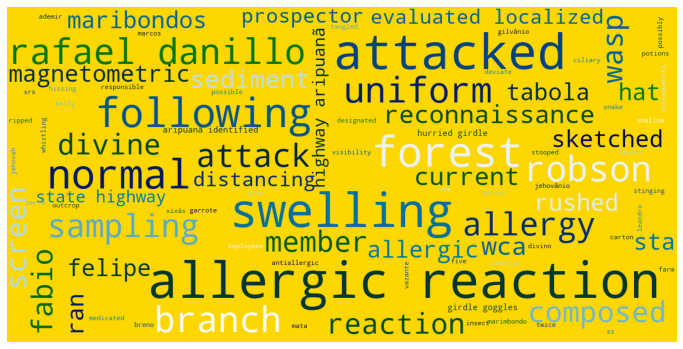

dict_keys(['allergic reaction', 'attacked', 'swelling', 'forest', 'normal', 'following', 'uniform', 'robson', 'branch', 'rafael danillo', 'sampling', 'allergy', 'attack', 'wasp', 'screen', 'reaction', 'member', 'fabio', 'composed', 'divine', 'reconnaissance', 'wca', 'current', 'sediment', 'magnetometric', 'sta', 'rushed', 'sketched', 'hat', 'maribondos', 'allergic', 'ran', 'tabola', 'felipe', 'prospector', 'distancing', 'evaluated localized', 'state highway', 'highway aripuanã', 'aripuanã identified', 'hurried girdle', 'girdle goggles', 'possibly', 'potions', 'insect', 'responsible', 'vms', 'xixás', 'stinging', 'play', 'visibility', 'hissing', 'ripped', 'tangled', 'gilvânio', 'antiallergic', 'designated', 'twice', 'employees', 'medicated', 'marcos', 'stooped', 'deviate', 'whistling', 'ademir', 'five', 'vazante', 'mata', 'serra', 'garrote', 'srs', 'leandro', 'jehovânio', 'shallow', 'carton', 'possible', 'looking', 'ss', 'breno', 'consequently', 'belly', 'jehovah', 'farm', 'lázaro', 'div

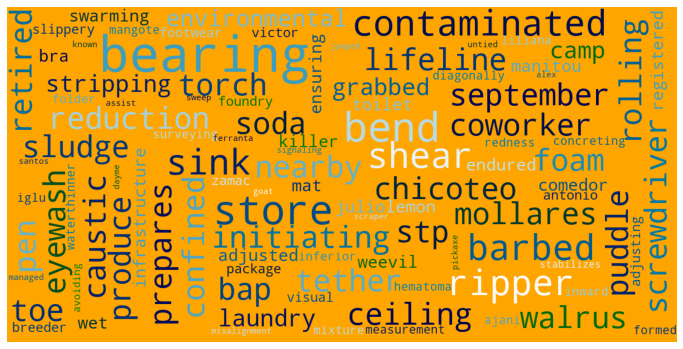

dict_keys(['bearing', 'store', 'bend', 'barbed', 'contaminated', 'sink', 'shear', 'ripper', 'tether', 'lifeline', 'toe', 'chicoteo', 'rolling', 'prepares', 'reduction', 'walrus', 'foam', 'bap', 'caustic', 'soda', 'initiating', 'ceiling', 'september', 'sludge', 'stp', 'coworker', 'puddle', 'torch', 'pen', 'confined', 'screwdriver', 'produce', 'retired', 'mollares', 'nearby', 'eyewash', 'camp', 'grabbed', 'laundry', 'stripping', 'environmental', 'swarming', 'weevil', 'endured', 'infrastructure', 'julio', 'toilet', 'bra', 'comedor', 'lemon', 'adjusted', 'registered', 'killer', 'manitou', 'ensuring', 'mat', 'wet', 'slippery', 'antonio', 'adjusting', 'foundry', 'zamac', 'package', 'footwear', 'victor', 'visual', 'breeder', 'surveying', 'measurement', 'concreting', 'mangote', 'inferior', 'hematoma', 'waterthinner', 'mixture', 'redness', 'formed', 'ajani', 'liliana', 'folder', 'iglu', 'diagonally', 'inward', 'stabilizes', 'avoiding', 'signaling', 'misalignment', 'scraper', 'santos', 'dayme', 

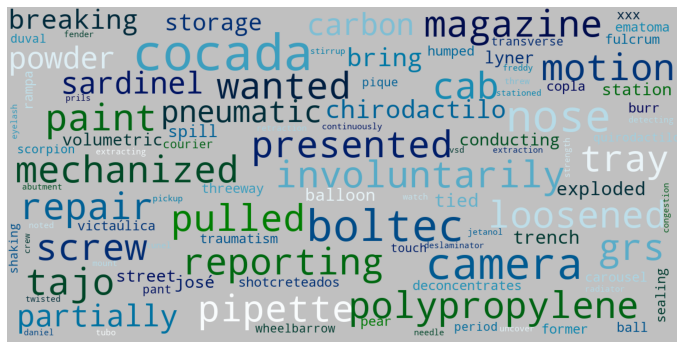

dict_keys(['cocada', 'boltec', 'nose', 'camera', 'magazine', 'presented', 'tray', 'pipette', 'grs', 'motion', 'screw', 'involuntarily', 'paint', 'polypropylene', 'pulled', 'wanted', 'reporting', 'cab', 'tajo', 'mechanized', 'repair', 'loosened', 'pneumatic', 'partially', 'powder', 'sardinel', 'carbon', 'breaking', 'chirodactilo', 'bring', 'storage', 'exploded', 'trench', 'tied', 'conducting', 'station', 'spill', 'street', 'josé', 'lyner', 'volumetric', 'balloon', 'rampa', 'xxx', 'carousel', 'deconcentrates', 'victaúlica', 'copla', 'former', 'ematoma', 'threeway', 'pear', 'sealing', 'fulcrum', 'traumatism', 'shotcreteados', 'ball', 'humped', 'burr', 'quirodactilo', 'duval', 'courier', 'pique', 'transverse', 'wheelbarrow', 'shaking', 'pant', 'scorpion', 'touch', 'period', 'continuously', 'extracting', 'vsd', 'freddy', 'mount', 'pickup', 'daniel', 'strength', 'threw', 'eyelash', 'needle', 'retraction', 'twisted', 'tunel', 'stationed', 'abutment', 'stirrup', 'noted', 'watch', 'extraction',

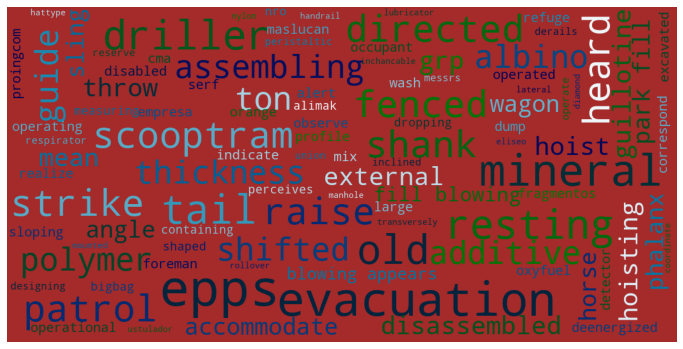

dict_keys(['epps', 'evacuation', 'mineral', 'driller', 'old', 'tail', 'resting', 'heard', 'directed', 'fenced', 'scooptram', 'raise', 'strike', 'shank', 'patrol', 'assembling', 'ton', 'additive', 'shifted', 'guide', 'polymer', 'albino', 'thickness', 'disassembled', 'external', 'throw', 'mean', 'hoisting', 'hoist', 'grp', 'guillotine', 'accommodate', 'phalanx', 'horse', 'sling', 'angle', 'wagon', 'park fill', 'fill blowing', 'blowing appears', 'sloping', 'empresa', 'serf', 'cma', 'operational', 'excavated', 'occupant', 'dump', 'large', 'wash', 'operated', 'observe', 'mix', 'realize', 'maslucan', 'fragmentos', 'operating', 'disabled', 'deenergized', 'profile', 'oxyfuel', 'proingcom', 'foreman', 'indicate', 'refuge', 'orange', 'alert', 'detector', 'correspond', 'containing', 'bigbag', 'perceives', 'shaped', 'measuring', 'nro', 'alimak', 'dropping', 'peristaltic', 'reserve', 'operate', 'designing', 'derails', 'messrs', 'inclined', 'union', 'respirator', 'ustulador', 'transversely', 'manhol

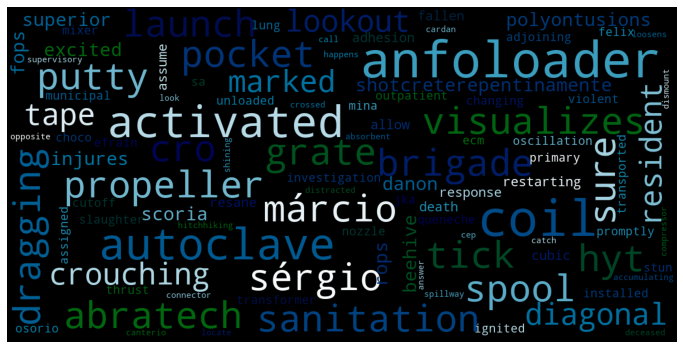

dict_keys(['anfoloader', 'coil', 'activated', 'autoclave', 'launch', 'brigade', 'márcio', 'sérgio', 'spool', 'pocket', 'sanitation', 'cro', 'visualizes', 'propeller', 'sure', 'abratech', 'putty', 'hyt', 'tick', 'dragging', 'grate', 'diagonal', 'crouching', 'marked', 'tape', 'lookout', 'resident', 'shotcreterepentinamente', 'superior', 'injures', 'rops', 'fops', 'polyontusions', 'scoria', 'beehive', 'excited', 'danon', 'resane', 'cubic', 'allow', 'adhesion', 'restarting', 'assume', 'fallen', 'response', 'death', 'investigation', 'efraín', 'osorio', 'felix', 'mina', 'installed', 'nozzle', 'lung', 'violent', 'stun', 'slaughter', 'choco', 'jka', 'promptly', 'transported', 'outpatient', 'municipal', 'mixer', 'ecm', 'sa', 'transformer', 'oscillation', 'queneche', 'adjoining', 'assigned', 'changing', 'primary', 'cutoff', 'unloaded', 'ignited', 'thrust', 'accumulating', 'dismount', 'look', 'shining', 'deceased', 'supervisory', 'locate', 'answer', 'call', 'distracted', 'happens', 'hitchhiking',

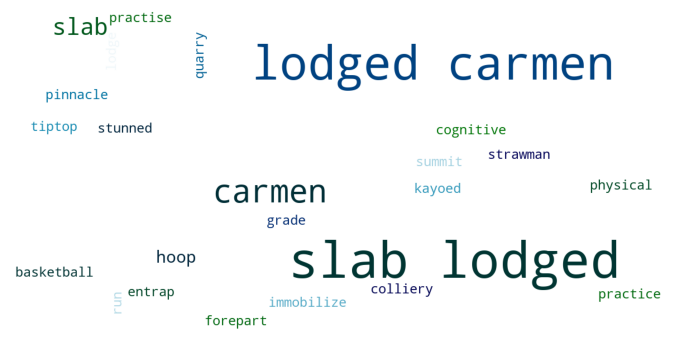

dict_keys(['slab lodged', 'lodged carmen', 'carmen', 'slab', 'hoop', 'kayoed', 'practice', 'lodge', 'practise', 'cognitive', 'immobilize', 'grade', 'stunned', 'quarry', 'run', 'summit', 'forepart', 'tiptop', 'entrap', 'physical', 'basketball', 'pinnacle', 'colliery', 'strawman'])


In [63]:
#function call for word cloud & print the unique words on each class (Potential Accident Level)

bg_color=['gold','orange','silver','brown','black','white']   

# cloud={}
for i in range(0,6):  
   corpus=[]
   print('\nPotential Accident Level: ',i)
   for j in data[data['Potential Accident Level']==i].index:
#         corpus.append(data['cleantext'][j]) 
       corpus= ' '.join([data['cleantext'][j],str(corpus)])
   show_wordcloud(corpus,bg_color[i])

In [64]:
import random
for x in [1,2]:
    i=random.randint(0,len(data))
    print("Potential Accident Level: ",data['Potential Accident Level'][i])
    print("---"*10)
    print(" ")
    print("Given:\n ",data['Description'][i])
    print(" ")
    print("preprocessed:\n ",data['preprocesstext'][i])
    print(" ")
    print("Unique words:\n ",data['cleantext'][i])
    print("===="*25,"\n")

Potential Accident Level:  0
------------------------------
 
Given:
  On 02/15/2017 at 3:27 pm, when performing the Magnetometric using GPS, the collaborator Antônio bumped the top of the field hat on a branch and was attacked by maribondos. He was bitten behind the ear and another on the shoulder, but he continued his activity because he felt no pain or swelling.
 
preprocessed:
  performing magnetometric using gps collaborator antônio bumped top field hat branch attacked maribondos bitten behind ear another shoulder continued activity felt pain swelling
 
Unique words:
  magnetometric antônio hat branch attacked maribondos swelling

Potential Accident Level:  1
------------------------------
 
Given:
  When the plant operator was semi-kneeling when lifting the lid or gate (15 kg) of the distributor box of the secondary mill No. 4 and No. 5, his right knee slips due to the presence of debris spilled on the platform or floor (Grating) - which gave him an extra effort in his left leg, 

#### word frequency count/ percentage

In [65]:
corpuslen=0
for i in data['preprocesstext']:
    corpuslen+=len(str(i).split())
print("corpus word frequency: ",corpuslen) 

#word frequency
for i in range(0,6):  
   corpus=[]
   documentlen=0
   for j in data[data['Potential Accident Level']==i].index:
        corpus.append(data['preprocesstext'][j])   
   documentlen+=len(str(corpus).split())
   print('\nPercentage word share of Potential Accident Level',i ,"- {:.2f}".format((documentlen/corpuslen)*100),"%")


corpus word frequency:  15044

Percentage word share of Potential Accident Level 0 - 13.16 %

Percentage word share of Potential Accident Level 1 - 17.08 %

Percentage word share of Potential Accident Level 2 - 19.38 %

Percentage word share of Potential Accident Level 3 - 35.09 %

Percentage word share of Potential Accident Level 4 - 8.45 %

Percentage word share of Potential Accident Level 5 - 6.85 %


##### Tokenizer
Regular expression based tokenizers to consider only alphabetical sequences and ignore numerical sequences.

In [66]:
import re
def complaint_to_words(comp):
    
    words = RegexpTokenizer('\w+').tokenize(comp)
    words = [re.sub(r'([xx]+)|([XX]+)|(\d+)', '', w).lower() for w in words]
    words = list(filter(lambda a: a != '', words))
    
    return words

In [67]:
all_words = list()
for comp in data['preprocesstext']:
    for w in complaint_to_words(comp):
        all_words.append(w)

In [68]:
print('Size of vocabulary: {}'.format(len(set(all_words))))

Size of vocabulary: 2764


In [69]:
all_words[-10:-1]

['front',
 'pit',
 'tilted',
 'lodged',
 'inside',
 'basket',
 'trapping',
 'right',
 'leg']

In [70]:
pip install gensim

Note: you may need to restart the kernel to use updated packages.


In [71]:
# For Data Preprocessing
import pandas as pd

# Gensim Libraries
import gensim
from gensim.models.word2vec import Word2Vec

# For visualization of word2vec model
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

In [72]:
# Using gensim to tokenize the description words for further preprocessing
data['preprocessed_text']=data['preprocesstext'].apply(gensim.utils.simple_preprocess)
data.head()

,Potential Accident Level,Description,cleantext,preprocesstext,preprocessed_text
0,3,While removing the drill rod of the Jumbo 08 f...,centralizer facilitate accelerate tightens,while removing drill rod jumbo maintenance sup...,"[while, removing, drill, rod, jumbo, maintenan..."
1,3,During the activation of a sodium sulphide pum...,activation sulphide piping uncoupled sulfide d...,during activation sodium sulphide pump piping ...,"[during, activation, sodium, sulphide, pump, p..."
2,2,In the sub-station MILPO located at level +170...,flat beak,substation milpo located level collaborator ex...,"[substation, milpo, located, level, collaborat..."
3,0,Being 9:45 am. approximately in the Nv. 1880 C...,soquet bhb identified hexagonal cristóbal exer...,being approximately personnel begin task unloc...,"[being, approximately, personnel, begin, task,..."
4,3,Approximately at 11:45 a.m. in circumstances t...,anthony group leader eduardo eric fernándezinj...,approximately am circumstance mechanic anthony...,"[approximately, am, circumstance, mechanic, an..."


In [73]:
#Identifying the word count of processed description
num_1=[]
for a_string in data['preprocesstext']:
    word_list = a_string.split()
    number_of_words = len(word_list)
    num_1.append(number_of_words)

max(num_1)

95

In [74]:
# Custome Word2Vec Genism Model - Converting the Preprocessed description tokens to Vector
num_features=95
min_word_count=1
num_workers=2
window_size=3
subsampling=1e-3
model = Word2Vec(data['preprocessed_text'],workers=num_workers,sg=1,min_count=min_word_count,window=window_size,sample=subsampling)
model.init_sims(replace=True)  #training
model_name = "my_domain_specific_word2vec_model"
model.save(model_name)

   * Word Embeddings are numeric vector representations of text that also maintain the semantic and contextual relationships within the words in the text corpus.

In [75]:
from gensim.models.word2vec import Word2Vec
model_name = "my_domain_specific_word2vec_model"
model = Word2Vec.load(model_name)

In [76]:
# Check dimension of word vectors
model.vector_size

100

In [77]:
# Filter the list of vectors to include only those that Word2Vec has a vector for
vector_list = [model.wv[word] for word in all_words if word in model.wv.key_to_index]

# # Create a list of the words corresponding to these vectors
words_filtered = [word for word in all_words if word in model.wv.key_to_index]

# # Zip the words together with their vector representations
word_vec_zip = zip(words_filtered, vector_list)

# # Cast to a dict so we can turn it into a DataFrame
word_vec_dict = dict(word_vec_zip)
df = pd.DataFrame.from_dict(word_vec_dict, orient='index')
df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
while,-0.041005,0.079446,0.018813,0.022315,0.063427,-0.157793,0.098961,0.215111,-0.162154,-0.059662,...,0.130337,0.011700,0.016285,0.060146,0.192802,0.112444,0.031963,-0.098489,0.077406,-0.023190
removing,-0.023681,0.095011,0.031582,0.038057,0.074578,-0.174906,0.071659,0.219333,-0.148495,-0.067476,...,0.115936,0.014644,0.033783,0.040086,0.196776,0.140255,0.041743,-0.097474,0.079843,-0.046693
drill,-0.033190,0.088962,0.055745,0.038981,0.089423,-0.155199,0.073326,0.221200,-0.134030,-0.069315,...,0.177139,0.047136,0.030180,0.059182,0.173817,0.162895,0.042392,-0.079851,0.058734,-0.016106


#### Dimensionality Reduction with t-SNE

    t-SNE
        - Tool to visualize high-dimensional data
        - It converts similarities between data points to joint probabilities and tries to minimize the Kullback-Leibler divergence between the joint probabilities of the low-dimensional embedding and the high-dimensional data

In [78]:
from sklearn.manifold import TSNE

# Initialize t-SNE
tsne = TSNE(n_components = 2, init = 'random', random_state = 10, perplexity = 100)

# Use only 400 rows to shorten processing time
tsne_df = tsne.fit_transform(df[:400])


In [79]:
# pip install adjustText

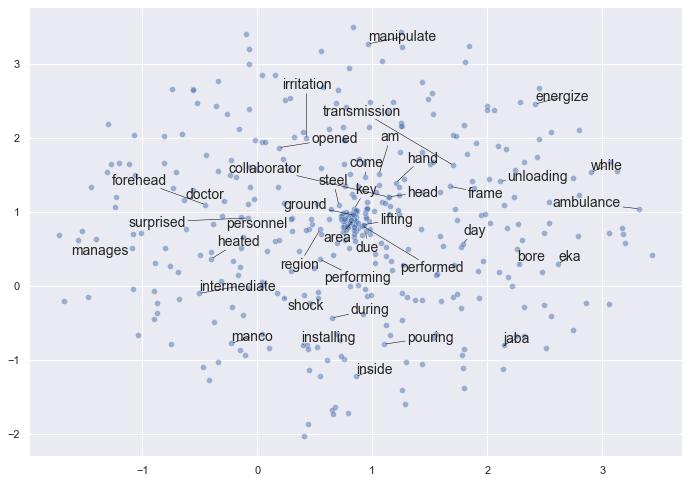

In [80]:
sns.set()
# Initialize figure
fig, ax = plt.subplots(figsize = (11.7, 8.27))
sns.scatterplot(tsne_df[:, 0], tsne_df[:, 1], alpha = 0.5)

# Import adjustText, initialize list of texts
from adjustText import adjust_text
texts = []
words_to_plot = list(np.arange(0, 400, 10))

# Append words to list
for word in words_to_plot:
    texts.append(plt.text(tsne_df[word, 0], tsne_df[word, 1], df.index[word], fontsize = 14))
    
# Plot text using adjust_text (because overlapping text is hard to read)
adjust_text(texts, force_points = 0.4, force_text = 0.4, 
            expand_points = (2,1), expand_text = (1,2),
            arrowprops = dict(arrowstyle = "-", color = 'black', lw = 0.5))

plt.show()

#### Inference:
     plot shows words are in clustered at centre [head,due,hand,area,during,inside] 
     few words [ambulance,energize, eka, irritation] are scattered across which will be the key words to help in predicitons
     

In [81]:
size=100
model.wv['environmental'].reshape((1, size))

array([[-0.03960419,  0.03620756,  0.09135299,  0.09796   ,  0.11281537,
        -0.04885529,  0.15622714,  0.20597742, -0.1745176 , -0.12116253,
        -0.03908912, -0.23880397, -0.03910371, -0.02829921,  0.03835992,
        -0.08040766,  0.05754394, -0.14945443,  0.02056565, -0.23422524,
         0.04155543,  0.00338178,  0.01649925, -0.09246958, -0.13097954,
         0.07292157, -0.00423182, -0.10703184, -0.07493407,  0.0400039 ,
         0.12372901,  0.13245715, -0.04703083, -0.12890258, -0.11173366,
         0.10160605,  0.08824446, -0.19111325, -0.10887261, -0.04857505,
         0.05815833, -0.13928977, -0.12029012,  0.08169983,  0.10919166,
         0.06713595, -0.01231871, -0.1027199 , -0.06113041,  0.1088566 ,
         0.03997213, -0.03572953, -0.06280721,  0.08298544, -0.1140843 ,
        -0.05155952,  0.08972383, -0.07235227,  0.0483515 , -0.10856669,
         0.11411613,  0.0894786 ,  0.03938214,  0.01935985, -0.10332148,
         0.12275128,  0.05969555,  0.16723904, -0.1

In [82]:
def document_vector(word2vec_model, words):
    # remove out-of-vocabulary words
#     doc = [word for word in words if word in model.wv.key_to_index]
#     print("===",np.mean(model.wv[words], axis=0))
#     print("===",np.mean(model.wv[doc], axis=0))
    return np.mean(model.wv[words], axis=0)

In [83]:
x = []
for words in data['preprocessed_text']: # append the vector for each document

    x.append(document_vector(model, words))
data_list = np.array(x) # list to array

In [84]:
data_list.shape

(455, 100)

In [85]:
# Concating the vectors to the dataset
data_list=pd.DataFrame(data_list)
data_1=pd.concat([data.reset_index(drop=True), data_list.reset_index(drop=True)], axis=1)

In [86]:
data_1.head(2)

,Potential Accident Level,Description,cleantext,preprocesstext,preprocessed_text,0,1,2,3,4,...,90,91,92,93,94,95,96,97,98,99
0,3,While removing the drill rod of the Jumbo 08 f...,centralizer facilitate accelerate tightens,while removing drill rod jumbo maintenance sup...,"[while, removing, drill, rod, jumbo, maintenan...",-0.035249,0.098743,0.032881,0.040050,0.073197,...,0.121777,0.018486,0.032881,0.038229,0.199819,0.131533,0.049125,-0.089101,0.078740,-0.034199
1,3,During the activation of a sodium sulphide pum...,activation sulphide piping uncoupled sulfide d...,during activation sodium sulphide pump piping ...,"[during, activation, sodium, sulphide, pump, p...",-0.036877,0.101964,0.041342,0.042525,0.079251,...,0.122360,0.024104,0.025162,0.042868,0.181206,0.116185,0.041636,-0.089318,0.063445,-0.029105


In [87]:
data_1.drop(["Description","cleantext","preprocesstext","preprocessed_text"], axis=1, inplace=True)

In [88]:
# pd.options.display.float_format = "{:,.2f}".format # float values to 2 decimal values

In [89]:
data_1.head()

,Potential Accident Level,0,1,2,3,4,5,6,7,8,...,90,91,92,93,94,95,96,97,98,99
0,3,-0.035249,0.098743,0.032881,0.040050,0.073197,-0.172346,0.077329,0.221101,-0.150337,...,0.121777,0.018486,0.032881,0.038229,0.199819,0.131533,0.049125,-0.089101,0.078740,-0.034199
1,3,-0.036877,0.101964,0.041342,0.042525,0.079251,-0.162596,0.071994,0.206190,-0.133923,...,0.122360,0.024104,0.025162,0.042868,0.181206,0.116185,0.041636,-0.089318,0.063445,-0.029105
2,2,-0.028947,0.102617,0.033908,0.046017,0.079360,-0.173651,0.077161,0.213365,-0.153512,...,0.122271,0.020797,0.024285,0.036773,0.202887,0.128700,0.049020,-0.094105,0.078720,-0.036779
3,0,-0.039198,0.097301,0.029565,0.038510,0.066885,-0.168190,0.077101,0.223130,-0.150681,...,0.124311,0.014009,0.019984,0.040535,0.195101,0.128062,0.054371,-0.089486,0.078164,-0.038433
4,3,-0.029345,0.096760,0.030641,0.035347,0.066366,-0.169789,0.079166,0.216418,-0.152136,...,0.125517,0.019980,0.032281,0.041269,0.195126,0.128808,0.047632,-0.094194,0.074656,-0.035104


## 2. Milestone 2: 
    ‣ Input: Output of milestone 
    1 ‣ Process:
        ‣ Step 1: NLP pre processing
        ‣ Step 2: Design, train and test machine learning classifiers
        ‣ Step 3: Design, train and test Neural networks classifiers
        ‣ Step 4: Design, train and test RNN or LSTM classifiers
        ‣ Step 5: Choose the best performing model classifier and pickle it.
    ‣ Output: Pickled model to be used for future prediction
    ‣ Submission: Interim report

## Machine learning classifiers

#### train-test split

In [90]:
Y = data_1['Potential Accident Level']
X = data_1.drop(['Potential Accident Level'], axis=1) 

In [91]:
Y.value_counts()

3    143
2    106
1     95
0     49
4     31
5     31
Name: Potential Accident Level, dtype: int64

In [92]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

In [93]:
### Normalize the train and test data

In [94]:
print('X_train shape : ({0},{1})'.format(X_train.shape[0], X_train.shape[1]))
print('Y_train shape : ({0},)'.format(Y_train.shape[0]))
print('X_test shape : ({0},{1})'.format(X_test.shape[0], X_test.shape[1]))
print('Y_test shape : ({0},)'.format(Y_test.shape[0]))

X_train shape : (364,100)
Y_train shape : (364,)
X_test shape : (91,100)
Y_test shape : (91,)


In [95]:
X_train[0]

259   -0.035802
11    -0.028736
250   -0.029231
83    -0.028079
224   -0.032953
         ...   
247   -0.034610
58    -0.032131
95    -0.033120
287   -0.039302
161   -0.030716
Name: 0, Length: 364, dtype: float32

####      Perform relevant sequence adding on the data

In [96]:
#padding
# limit the maximum review length to max_words by truncating longer reviews and padding shorter reviews with a null value (0) using the pad_sequences() function in Keras?
from tensorflow.keras.preprocessing import sequence  #Pads sequences to the same length
max_review_length = 100
X_train = sequence.pad_sequences(X_train.values.tolist(), maxlen=max_review_length)
X_test = sequence.pad_sequences(X_test.values.tolist(), maxlen=max_review_length)

## LogisticRegression

In [97]:
# X_train.describe

In [98]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report


LogisticRegression_model = LogisticRegression()
LogisticRegression_model.fit(X_train,Y_train)
pred = LogisticRegression_model.predict(X_test)
print("\nAccuracy Score LogReg: ",accuracy_score(Y_test,pred)*100,'\n')
print('Confusion matrix:', confusion_matrix(Y_test,pred),'\n')
print('Classification report:',classification_report(Y_test,pred))


Accuracy Score LogReg:  31.868131868131865 

Confusion matrix: [[ 0  0  0 10  0  0]
 [ 0  0  0 19  0  0]
 [ 0  0  0 21  0  0]
 [ 0  0  0 29  0  0]
 [ 0  0  0  6  0  0]
 [ 0  0  0  6  0  0]] 

Classification report:               precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.00      0.00      0.00        19
           2       0.00      0.00      0.00        21
           3       0.32      1.00      0.48        29
           4       0.00      0.00      0.00         6
           5       0.00      0.00      0.00         6

    accuracy                           0.32        91
   macro avg       0.05      0.17      0.08        91
weighted avg       0.10      0.32      0.15        91



#### Model output:
          Overall 35.3% Accuracy. This can't be used as a predictive model 

## Naive-Bayes

In [99]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score
clf = BernoulliNB()
clf.fit(X_train, Y_train)
pred = clf.predict(X_test)
print("\nAccuracy Score NB: ",accuracy_score(Y_test,pred)*100,'\n')
print('Confusion matrix:', confusion_matrix(Y_test,pred),'\n')
print('Classification report:',classification_report(Y_test,pred),'\n')


Accuracy Score NB:  31.868131868131865 

Confusion matrix: [[ 0  0  0 10  0  0]
 [ 0  0  0 19  0  0]
 [ 0  0  0 21  0  0]
 [ 0  0  0 29  0  0]
 [ 0  0  0  6  0  0]
 [ 0  0  0  6  0  0]] 

Classification report:               precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.00      0.00      0.00        19
           2       0.00      0.00      0.00        21
           3       0.32      1.00      0.48        29
           4       0.00      0.00      0.00         6
           5       0.00      0.00      0.00         6

    accuracy                           0.32        91
   macro avg       0.05      0.17      0.08        91
weighted avg       0.10      0.32      0.15        91
 



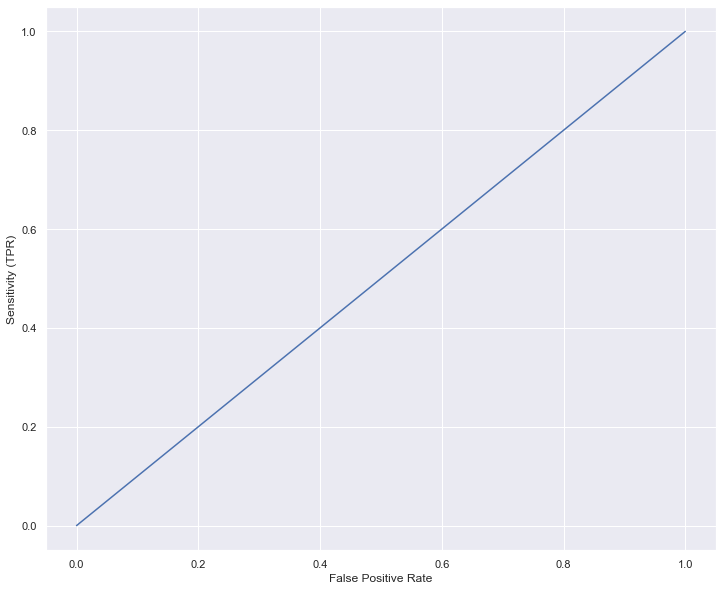

In [100]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr, tpr, thresh = roc_curve(Y_test,pred, pos_label=1)
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(Y_test))]
p_fpr, p_tpr, _ = roc_curve(Y_test, random_probs, pos_label=1)
plt.figure(figsize=(12,10))
sns.lineplot(x=fpr,y=tpr,);

plt.xlabel("False Positive Rate");
plt.ylabel("Sensitivity (TPR)");

#### Model output:
          Overall 36% Accuracy. This can't be used as a predictive model 

## RandomForestClassifier

In [101]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
clf=RandomForestClassifier()
clf.fit(X_train, Y_train)
pred = clf.predict(X_test)
print("\nAccuracy Score NB: ",accuracy_score(Y_test,pred)*100,'\n')
print('Confusion matrix:', confusion_matrix(Y_test,pred),'\n')
print('Classification report:',classification_report(Y_test,pred),'\n')


Accuracy Score NB:  31.868131868131865 

Confusion matrix: [[ 0  0  0 10  0  0]
 [ 0  0  0 19  0  0]
 [ 0  0  0 21  0  0]
 [ 0  0  0 29  0  0]
 [ 0  0  0  6  0  0]
 [ 0  0  0  6  0  0]] 

Classification report:               precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.00      0.00      0.00        19
           2       0.00      0.00      0.00        21
           3       0.32      1.00      0.48        29
           4       0.00      0.00      0.00         6
           5       0.00      0.00      0.00         6

    accuracy                           0.32        91
   macro avg       0.05      0.17      0.08        91
weighted avg       0.10      0.32      0.15        91
 



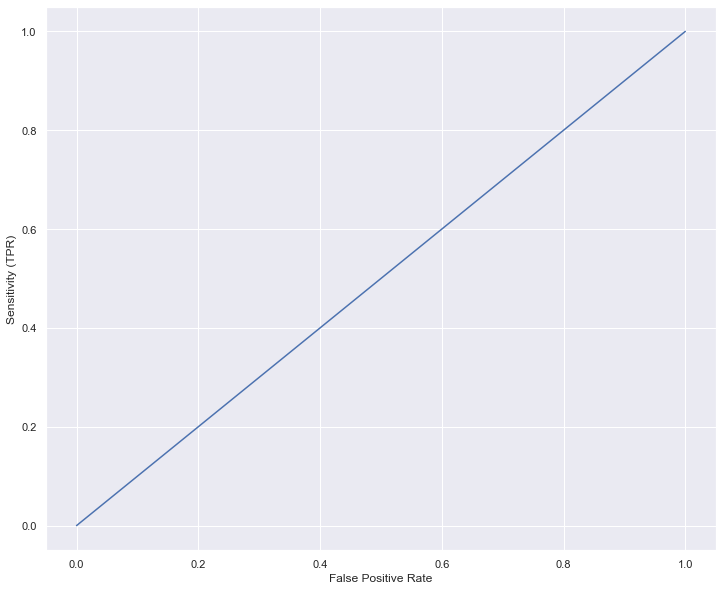

In [102]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr, tpr, thresh = roc_curve(Y_test,pred, pos_label=1)
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(Y_test))]
p_fpr, p_tpr, _ = roc_curve(Y_test, random_probs, pos_label=1)
plt.figure(figsize=(12,10))
sns.lineplot(x=fpr,y=tpr,);

plt.xlabel("False Positive Rate");
plt.ylabel("Sensitivity (TPR)");

In [103]:
# from sklearn.metrics import roc_auc_score
# roc_curve(Y_test,pred, pos_label=1)

#### Model output:
          Overall 49% Accuracy. This is better then the other 3 models

### To Be Continued!!!

# ANN

In [104]:
import tensorflow as tf

In [105]:
#Performing Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

    first hidden layer by using the Dense class which is part of the layers module. This class accepts 2 inputs:-

        1. units:- number of neurons that will be present in the respective layer

        2. activation:- specify which activation function to be used


In [106]:
#Initialising ANN
ann = tf.keras.models.Sequential()
#Adding First Hidden Layer
ann.add(tf.keras.layers.Dense(units=10,activation="relu"))
#Adding Second Hidden Layer
ann.add(tf.keras.layers.Dense(units=10,activation="relu"))
#Adding Output Layer
ann.add(tf.keras.layers.Dense(units=5,activation="softmax"))
#Compiling ANN
ann.compile(optimizer="adam",loss="categorical_crossentropy",metrics=['accuracy'])

In [107]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import regularizers, optimizers

def train_and_test_loop(iterations, lr, Lambda, verb=True):

    ## hyperparameters
    iterations = iterations
    learning_rate = lr
    hidden_nodes = 3
    output_nodes = 10
        
    model = Sequential()
    model.add(Dense(hidden_nodes, input_shape=(100,), activation='relu'))
    model.add(Dense(hidden_nodes, activation='relu'))
    model.add(Dense(output_nodes, activation='softmax', kernel_regularizer=regularizers.l2(Lambda)))
    
    sgd = optimizers.SGD(lr=learning_rate, decay=1e-6, momentum=0.9)
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    
    # Fit the model
    model.fit(X_train, Y_train.ravel(), epochs=iterations, batch_size=1000, verbose= 1)

In [108]:
#Fitting ANN
ann.fit(X_train,Y_train.ravel(),batch_size=32,epochs = 10)

Train on 364 samples
Epoch 1/10
364/364 [==============================] - 1s 1ms/sample - loss: 17.9735 - accuracy: 1.0000
Epoch 2/10
364/364 [==============================] - 0s 38us/sample - loss: 17.9735 - accuracy: 1.0000
Epoch 3/10
364/364 [==============================] - 0s 52us/sample - loss: 17.9735 - accuracy: 1.0000
Epoch 4/10
364/364 [==============================] - 0s 54us/sample - loss: 17.9735 - accuracy: 1.0000
Epoch 5/10
364/364 [==============================] - 0s 99us/sample - loss: 17.9735 - accuracy: 1.0000
Epoch 6/10
364/364 [==============================] - 0s 56us/sample - loss: 17.9735 - accuracy: 1.0000
Epoch 7/10
364/364 [==============================] - 0s 57us/sample - loss: 17.9735 - accuracy: 1.0000
Epoch 8/10
364/364 [==============================] - 0s 59us/sample - loss: 17.9735 - accuracy: 1.0000
Epoch 9/10
364/364 [==============================] - 0s 67us/sample - loss: 17.9735 - accuracy: 1.0000
Epoch 10/10
364/364 [=======================

In [109]:
# #Predicting result for Single Observation
# print(ann.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1,50000]])) > 0.5)

#### Inference

## Bi-directional LSTM

In [110]:
# lr = 0.00001
# Lambda = 0
# train_and_test_loop(1, lr, Lambda)